In [1]:
import numpy as np
import glob
import matplotlib.pyplot as plt

In [2]:
!pwd

/home/oem/ml_mg


In [ ]:
dir_path = 'new_approach/new_best_model_on_F6TEST_500examples_latent_interp_sf12.0/'

gen_gt_color = '#FC9272'
ip_gt_color = '#1C9099'
ip_gen_color = '#2ca25f'

ticklabelsize = 17
axeslabelsize = 19
titlesize = 20

In [77]:
def plot_variance_skewness_kurtosis(
    gts_cumulant_x2, ips_cumulant_y2, gts_cumulant_y2, gens_cumulant_y2,
    gts_cumulant_x3, ips_cumulant_y3, gts_cumulant_y3, gens_cumulant_y3,
    gts_cumulant_x4, ips_cumulant_y4, gts_cumulant_y4, gens_cumulant_y4
):
    fig, ax = plt.subplots(2, 3, figsize=(22, 8), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    fig.subplots_adjust(hspace=0)

    ax[0, 0].plot(gts_cumulant_x2, ips_cumulant_y2, label='GR sim')
    ax[0, 0].plot(gts_cumulant_x2, gts_cumulant_y2, label='f(R) sim')
    ax[0, 0].plot(gts_cumulant_x2, gens_cumulant_y2, label='cGAN')
    ax[0, 0].set_ylabel('Variance', fontsize=axeslabelsize)
    ax[0, 0].set_xlabel(r'$\log{R_{th}}$', fontsize=axeslabelsize)

    ax[0, 0].set_ylim(bottom=0.5)
    ax[0, 0].legend(fontsize=ticklabelsize)
    # ax[0, 0].set_title(title)

    ax[1, 0].plot(gts_cumulant_x2, ((10**gts_cumulant_y2)/(10**ips_cumulant_y2)) - 1, label='f(R) sim <-> GR sim')
    ax[1, 0].plot(gts_cumulant_x2, ((10**gens_cumulant_y2)/(10**ips_cumulant_y2)) - 1, label='cGAN <-> GR sim')
    ax[1, 0].set_ylim([-0.05, 0.5])
    ax[1, 0].legend(fontsize=ticklabelsize)
    ax[1, 0].set_xlabel(r'$\log{R_{th}}$', fontsize=axeslabelsize)
    ax[1, 0].set_ylabel(r'$\Delta \sigma^2$', fontsize=axeslabelsize)

    ax[0, 1].plot(gts_cumulant_x3, ips_cumulant_y3, label='GR sim')
    ax[0, 1].plot(gts_cumulant_x3, gts_cumulant_y3, label='f(R) sim')
    ax[0, 1].plot(gts_cumulant_x3, gens_cumulant_y3, label='cGAN')
    ax[0, 1].set_ylabel('Skewness', fontsize=axeslabelsize)
    ax[0, 1].set_xlabel(r'$\log{R_{th}}$', fontsize=axeslabelsize)

    ax[0, 1].set_ylim(bottom=0.5)
    ax[0, 1].legend(fontsize=ticklabelsize)
    # ax[0, 1].set_title(title)

    ax[1, 1].plot(gts_cumulant_x3, ((10**gts_cumulant_y3)/(10**ips_cumulant_y3)) - 1, label='f(R) sim <-> GR sim')
    ax[1, 1].plot(gts_cumulant_x3, ((10**gens_cumulant_y3)/(10**ips_cumulant_y3)) - 1, label='cGAN <-> GR sim')
    ax[1, 1].set_ylim([-2, 2])
    ax[1, 1].legend(fontsize=ticklabelsize)
    ax[1, 1].set_xlabel(r'$\log{R_{th}}$', fontsize=axeslabelsize)
    ax[1, 1].set_ylabel(r'$\Delta Skewness$', fontsize=axeslabelsize)

    ax[0, 2].plot(gts_cumulant_x4, ips_cumulant_y4, label='GR sim')
    ax[0, 2].plot(gts_cumulant_x4, gts_cumulant_y4, label='f(R) sim')
    ax[0, 2].plot(gts_cumulant_x4, gens_cumulant_y4, label='cGAN')
    ax[0, 2].set_ylabel('Kurtosis', fontsize=axeslabelsize)
    ax[0, 2].set_xlabel(r'$\log{R_{th}}$', fontsize=axeslabelsize)

    ax[0, 2].set_ylim(bottom=0.5)
    ax[0, 2].legend(fontsize=ticklabelsize)
    # ax[0, 2].set_title(title)

    ax[1, 2].plot(gts_cumulant_x4, ((10**gts_cumulant_y4)/(10**ips_cumulant_y4)) - 1, label='f(R) sim <-> GR sim')
    ax[1, 2].plot(gts_cumulant_x4, ((10**gens_cumulant_y4)/(10**ips_cumulant_y4)) - 1, label='cGAN <-> GR sim')
    ax[1, 2].set_ylim([-2, 2])
    ax[1, 2].legend(fontsize=ticklabelsize)
    ax[1, 2].set_xlabel(r'$\log{R_{th}}$')
    ax[1, 2].set_ylabel(r'$\Delta Kurtosis$')
    
    for a in ax:
        for b in a:
            b.tick_params(axis='x', labelsize=ticklabelsize)
            b.tick_params(axis='y', labelsize=ticklabelsize)

    plt.show()

def mean_ps(k, ps_gen_median, ps_gt_median, ps_ip_median, title=None):
    fig, ax = plt.subplots(2, 1, figsize=(7.5, 6.5), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    fig.subplots_adjust(hspace=0)

    ax[0].loglog(k, ps_gen_median, c=gen_gt_color, label='cGAN')
    ax[0].loglog(k, ps_ip_median, c=ip_gt_color, label=fr'GR sim')
    ax[0].loglog(k, ps_gt_median, c='black', label='F4 sim')
    ax[0].legend(fontsize=ticklabelsize)
    ax[0].tick_params(axis='x', labelsize=ticklabelsize)
    ax[0].tick_params(axis='y', labelsize=ticklabelsize)
    # ax[0].fill_between(k, ps_gen_median-std_gen, ps_gen_median+std_gen ,alpha=0.3, facecolor=gen_gt_color)
    # ax[0].fill_between(k, ps_gen_median-mad_gen, ps_gen_median+mad_gen ,alpha=0.1, facecolor=gen_gt_color)
    ax[0].set_ylabel('$P(k)$', fontsize=titlesize)
    ax[0].set_yticks([100, 1000])
    # ax[0].set_ylim([10, 1000])
    ax[0].set_title(title, fontsize=titlesize)

    ax[1].set_xscale('log')
    ax[1].plot(k, 100 * (ps_gen_median - ps_gt_median) / ps_gt_median, c=gen_gt_color)
    ax[1].plot(k, 100 * (ps_ip_median - ps_gt_median) / ps_gt_median, c=ip_gt_color)
    ax[1].axhline(y=0, c='black', linestyle='--')
    ax[1].set_ylabel(r'$\dfrac{P(k)}{P_{f(R)}(k)} - 1$ (%)', fontsize=axeslabelsize)
    #ax[1].set_ylabel('(P(k)/P_fr(k)) - 1')
    ax[1].set_xlabel('$k$ (h/Mpc)', fontsize=axeslabelsize);
    ax[1].tick_params(axis='x', labelsize=ticklabelsize)
    ax[1].tick_params(axis='y', labelsize=ticklabelsize)
    ax[1].fill_between(k, -15, 15, alpha=0.2)
    # ax[1].fill_between(k, -ps_gt_std, ps_gt_std, alpha=0.1)
    ax[0].set_xlim([k.min(), 5])
    ax[1].set_xlim([k.min(), 5])
    ax[1].set_ylim([-30, +30])
    ax[1].set_yticks(np.arange(-30, +30, 10))

    plt.show()

def median_ps(k, ps_gen_median, ps_gt_median, ps_ip_median, title=None):
    fig, ax = plt.subplots(2, 1, figsize=(7.5, 6.5), sharex=True, gridspec_kw={'height_ratios': [2, 1]})
    fig.subplots_adjust(hspace=0)

    ax[0].loglog(k, ps_gen_median, c=gen_gt_color, label='cGAN')
    ax[0].loglog(k, ps_ip_median, c=ip_gt_color, label=fr'GR sim')
    ax[0].loglog(k, ps_gt_median, c='black', label='F4 sim')
    ax[0].legend(fontsize=ticklabelsize)
    ax[0].tick_params(axis='x', labelsize=ticklabelsize)
    ax[0].tick_params(axis='y', labelsize=ticklabelsize)
    # ax[0].fill_between(k, ps_gen_median-std_gen, ps_gen_median+std_gen ,alpha=0.3, facecolor=gen_gt_color)
    # ax[0].fill_between(k, ps_gen_median-mad_gen, ps_gen_median+mad_gen ,alpha=0.1, facecolor=gen_gt_color)
    ax[0].set_ylabel('$P(k)$', fontsize=titlesize)
    ax[0].set_yticks([100, 1000])
    # ax[0].set_ylim([10, 1000])
    ax[0].set_title(title, fontsize=titlesize)

    ax[1].set_xscale('log')
    ax[1].plot(k, 100 * (ps_gen_median - ps_gt_median) / ps_gt_median, c=gen_gt_color)
    ax[1].plot(k, 100 * (ps_ip_median - ps_gt_median) / ps_gt_median, c=ip_gt_color)
    ax[1].axhline(y=0, c='black', linestyle='--')
    ax[1].set_ylabel(r'$\dfrac{P(k)}{P_{f(R)}(k)} - 1$ (%)', fontsize=axeslabelsize)
    #ax[1].set_ylabel('(P(k)/P_fr(k)) - 1')
    ax[1].set_xlabel('$k$ (h/Mpc)', fontsize=axeslabelsize);
    ax[1].tick_params(axis='x', labelsize=ticklabelsize)
    ax[1].tick_params(axis='y', labelsize=ticklabelsize)
    ax[1].fill_between(k, -15, 15, alpha=0.2)
    # ax[1].fill_between(k, -ps_gt_std, ps_gt_std, alpha=0.1)
    ax[0].set_xlim([k.min(), 5])
    ax[1].set_xlim([k.min(), 5])
    ax[1].set_ylim([-30, +30])
    ax[1].set_yticks(np.arange(-30, +30, 10))

    plt.show()

# Test on F6 -- F4 train -- latent extrapolation (scale_factor=12.0)

In [78]:
gts_cumulant_x2 = np.load(dir_path+'cumulant2_x_gt_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
ips_cumulant_y2 = np.load(dir_path+'cumulant2_y_ip_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
gts_cumulant_y2 = np.load(dir_path+'cumulant2_y_gt_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
gens_cumulant_y2 = np.load(dir_path+'cumulant2_y_gen_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')

gts_cumulant_x3 = np.load(dir_path +'cumulant3_x_gt_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
ips_cumulant_y3 = np.load(dir_path+'cumulant3_y_ip_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
gts_cumulant_y3 = np.load(dir_path+'cumulant3_y_gt_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
gens_cumulant_y3 = np.load(dir_path+'cumulant3_y_gen_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')

gts_cumulant_x4 = np.load(dir_path+'cumulant4_x_gt_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
ips_cumulant_y4 = np.load(dir_path+'cumulant4_y_ip_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
gts_cumulant_y4 = np.load(dir_path+'cumulant4_y_gt_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
gens_cumulant_y4 = np.load(dir_path+'cumulant4_y_gen_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')

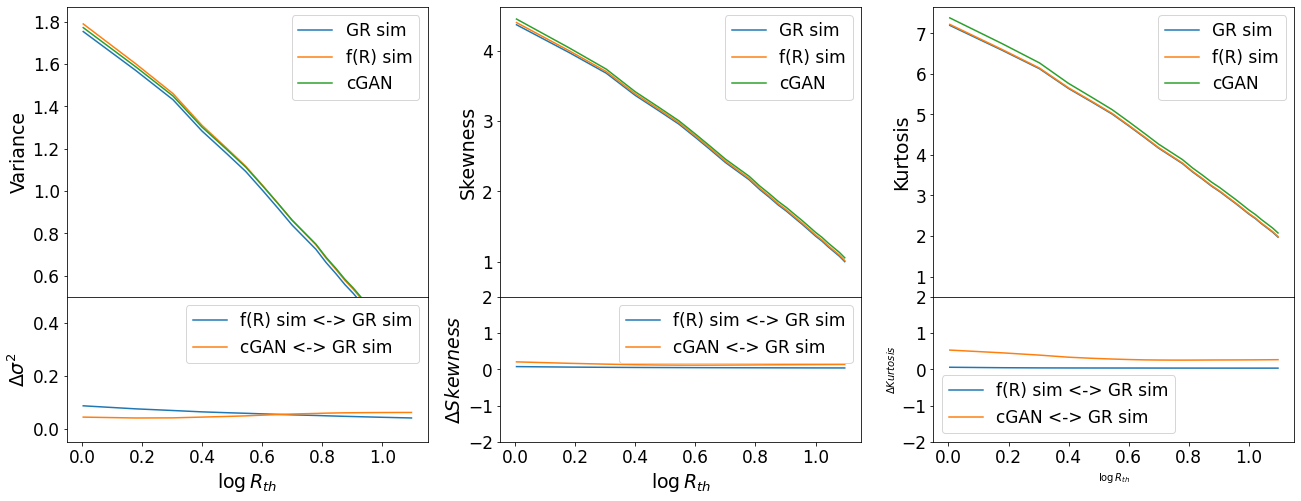

In [79]:
plot_variance_skewness_kurtosis(
    gts_cumulant_x2, ips_cumulant_y2, gts_cumulant_y2, gens_cumulant_y2,
    gts_cumulant_x3, ips_cumulant_y3, gts_cumulant_y3, gens_cumulant_y3,
    gts_cumulant_x4, ips_cumulant_y4, gts_cumulant_y4, gens_cumulant_y4
)

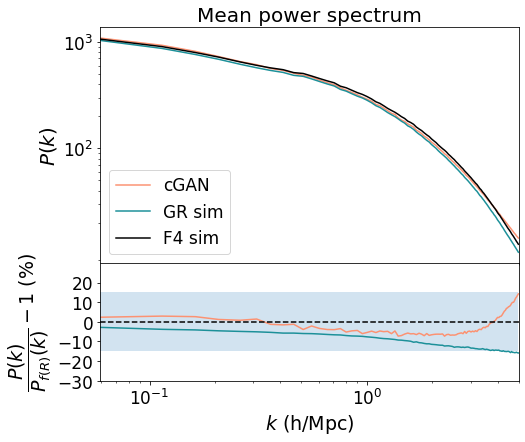

In [80]:
k = np.load(dir_path+'k_CHECK_F4_256X256_mean_40epoch_F6_den_latent_interp_1.npy')
ps_gen_median = np.load(dir_path+'ps_gen_CHECK_F4_256X256_mean_40epoch_F6_den_latent_interp_1.npy')
ps_ip_median = np.load(dir_path+'ps_ip_CHECK_F4_256X256_mean_40epoch_F6_den_latent_interp_1.npy')
ps_gt_median = np.load(dir_path+'ps_gt_CHECK_F4_256X256_mean_40epoch_F6_den_latent_interp_1.npy')

mean_ps(k, ps_gen_median, ps_gt_median, ps_ip_median, title='Mean power spectrum')

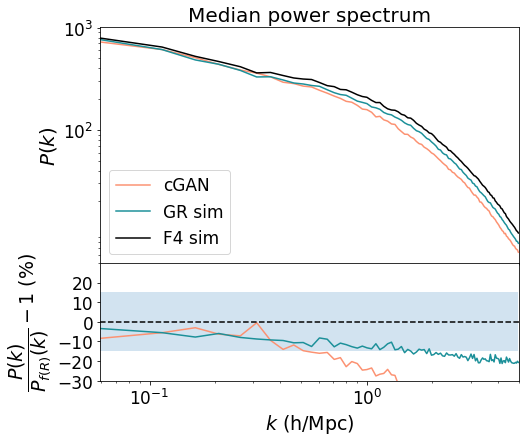

In [81]:
k = np.load(dir_path+'k_CHECK_F4_256X256_median_40epoch_F6_den_latent_interp_1.npy')
ps_gen_median = np.load(dir_path+'ps_gen_CHECK_F4_256X256_median_40epoch_F6_den_latent_interp_1.npy')
ps_ip_median = np.load(dir_path+'ps_ip_CHECK_F4_256X256_median_40epoch_F6_den_latent_interp_1.npy')
ps_gt_median = np.load(dir_path+'ps_gt_CHECK_F4_256X256_median_40epoch_F6_den_latent_interp_1.npy')

median_ps(k, ps_gen_median, ps_gt_median, ps_ip_median, title='Median power spectrum')

In [ ]:
x_real = np.load(dir_path+'mass_hist_xaxis_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
y_fake = np.load(dir_path+'mass_gen_hist_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
y_real = np.load(dir_path+'mass_gt_hist_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
y_ip = np.load(dir_path+'mass_ip_hist_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')

fig, ax = plt.subplots(1, 1, figsize=(8, 7))
ax.plot(x_real, y_fake, label=f'cGAN', c=gen_gt_color, alpha=0.7, linewidth=3)
ax.plot(x_real, y_real, label=f'F4 sim', c='black', alpha=0.7, linewidth=3)
ax.plot(x_real, y_ip, label=f'GR sim', c=ip_gt_color, alpha=0.7, linewidth=3)
ax.tick_params(axis='x', labelsize=ticklabelsize)
ax.tick_params(axis='y', labelsize=ticklabelsize)
ax.legend(fontsize=ticklabelsize)
ax.set_xscale('log');
ax.set_yscale('log')
ax.set_ylabel('Pixel count', fontsize=axeslabelsize)
ax.set_xlabel('Overdensity', fontsize=axeslabelsize)

FileNotFoundError: [Errno 2] No such file or directory: 'new_approach/new_best_model_F4veldiv_TEST_500examples_25epoch_minus900_400scale/mass_hist_xaxis_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy'

Same as above but with linear y-axis scale

Text(0.5, 0, 'Overdensity')

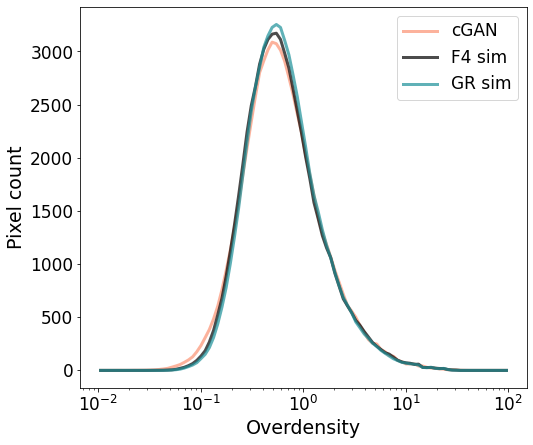

In [83]:
x_real = np.load(dir_path+'mass_hist_xaxis_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
y_fake = np.load(dir_path+'mass_gen_hist_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
y_real = np.load(dir_path+'mass_gt_hist_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')
y_ip = np.load(dir_path+'mass_ip_hist_mean_CHECK_F4_256X256_40epoch_F6_den_latent_interp_1.npy')

fig, ax = plt.subplots(1, 1, figsize=(8, 7))
ax.plot(x_real, y_fake, label=f'cGAN', c=gen_gt_color, alpha=0.7, linewidth=3)
ax.plot(x_real, y_real, label=f'F4 sim', c='black', alpha=0.7, linewidth=3)
ax.plot(x_real, y_ip, label=f'GR sim', c=ip_gt_color, alpha=0.7, linewidth=3)
ax.tick_params(axis='x', labelsize=ticklabelsize)
ax.tick_params(axis='y', labelsize=ticklabelsize)
ax.legend(fontsize=ticklabelsize)
ax.set_xscale('log');
# ax.set_yscale('log')
ax.set_ylabel('Pixel count', fontsize=axeslabelsize)
ax.set_xlabel('Overdensity', fontsize=axeslabelsize)

# Test on F5 -- F4 train -- latent extrapolation (scale_factor=5.0)

In [85]:
dir_path = 'new_approach/new_best_model_on_F5TEST_500examples_latent_interp_sf5.0/'

In [86]:
gts_cumulant_x2 = np.load(dir_path+'cumulant2_x_gt_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
ips_cumulant_y2 = np.load(dir_path+'cumulant2_y_ip_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
gts_cumulant_y2 = np.load(dir_path+'cumulant2_y_gt_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
gens_cumulant_y2 = np.load(dir_path+'cumulant2_y_gen_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')

gts_cumulant_x3 = np.load(dir_path +'cumulant3_x_gt_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
ips_cumulant_y3 = np.load(dir_path+'cumulant3_y_ip_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
gts_cumulant_y3 = np.load(dir_path+'cumulant3_y_gt_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
gens_cumulant_y3 = np.load(dir_path+'cumulant3_y_gen_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')

gts_cumulant_x4 = np.load(dir_path+'cumulant4_x_gt_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
ips_cumulant_y4 = np.load(dir_path+'cumulant4_y_ip_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
gts_cumulant_y4 = np.load(dir_path+'cumulant4_y_gt_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
gens_cumulant_y4 = np.load(dir_path+'cumulant4_y_gen_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')

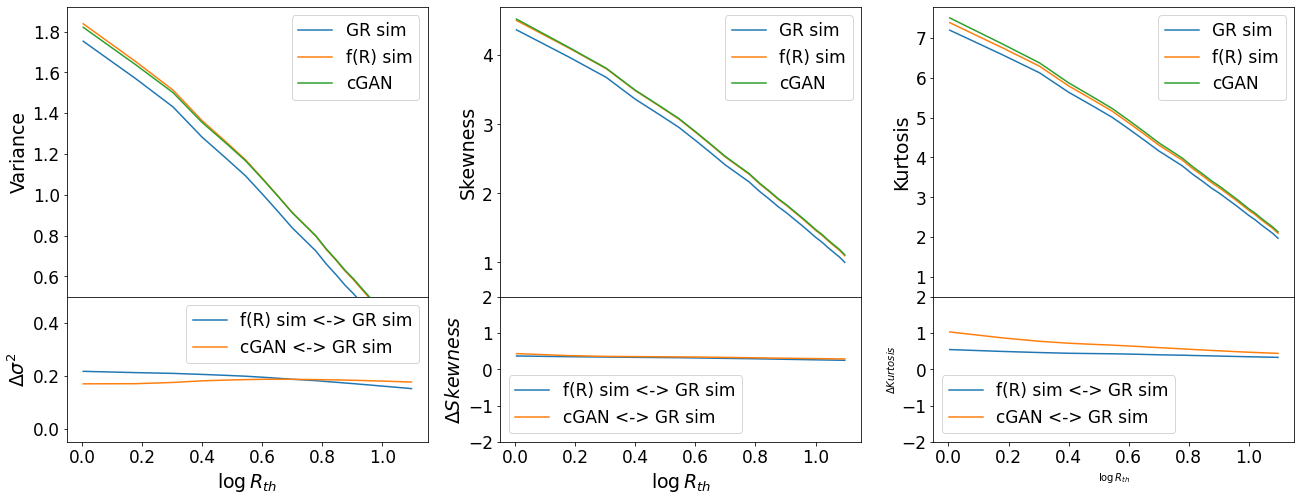

In [87]:
plot_variance_skewness_kurtosis(
    gts_cumulant_x2, ips_cumulant_y2, gts_cumulant_y2, gens_cumulant_y2,
    gts_cumulant_x3, ips_cumulant_y3, gts_cumulant_y3, gens_cumulant_y3,
    gts_cumulant_x4, ips_cumulant_y4, gts_cumulant_y4, gens_cumulant_y4
)

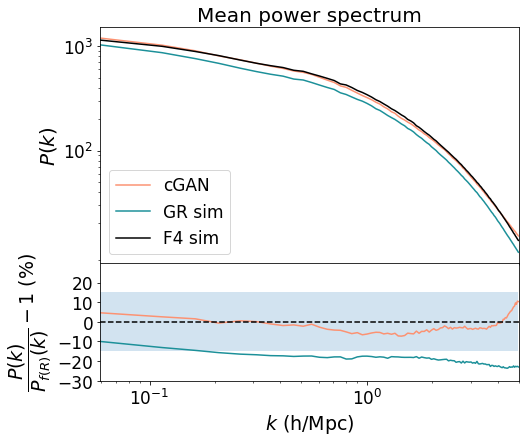

In [88]:
k = np.load(dir_path+'k_CHECK_F4_256X256_mean_40epoch_F5_den_latent_interp_1.npy')
ps_gen_median = np.load(dir_path+'ps_gen_CHECK_F4_256X256_mean_40epoch_F5_den_latent_interp_1.npy')
ps_ip_median = np.load(dir_path+'ps_ip_CHECK_F4_256X256_mean_40epoch_F5_den_latent_interp_1.npy')
ps_gt_median = np.load(dir_path+'ps_gt_CHECK_F4_256X256_mean_40epoch_F5_den_latent_interp_1.npy')

mean_ps(k, ps_gen_median, ps_gt_median, ps_ip_median, title='Mean power spectrum')

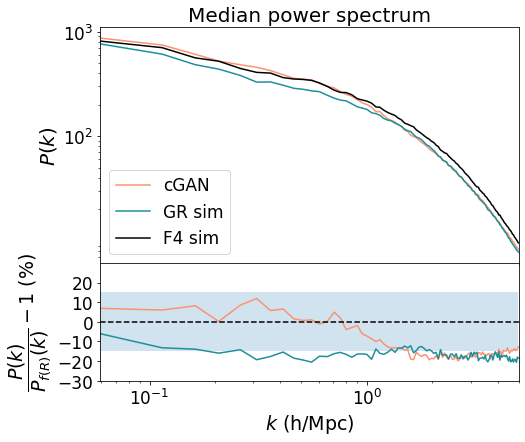

In [89]:
k = np.load(dir_path+'k_CHECK_F4_256X256_median_40epoch_F5_den_latent_interp_1.npy')
ps_gen_median = np.load(dir_path+'ps_gen_CHECK_F4_256X256_median_40epoch_F5_den_latent_interp_1.npy')
ps_ip_median = np.load(dir_path+'ps_ip_CHECK_F4_256X256_median_40epoch_F5_den_latent_interp_1.npy')
ps_gt_median = np.load(dir_path+'ps_gt_CHECK_F4_256X256_median_40epoch_F5_den_latent_interp_1.npy')

median_ps(k, ps_gen_median, ps_gt_median, ps_ip_median, title='Median power spectrum')

Text(0.5, 0, 'Overdensity')

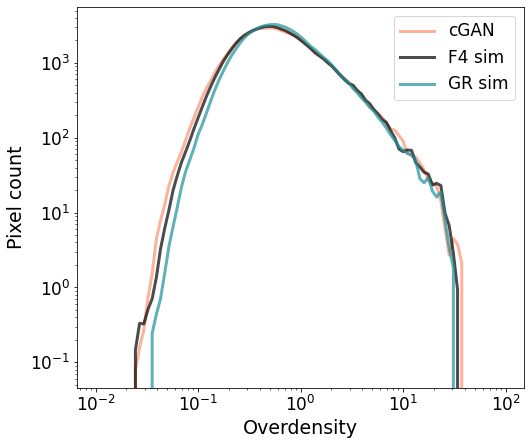

In [90]:
x_real = np.load(dir_path+'mass_hist_xaxis_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
y_fake = np.load(dir_path+'mass_gen_hist_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
y_real = np.load(dir_path+'mass_gt_hist_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
y_ip = np.load(dir_path+'mass_ip_hist_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')

fig, ax = plt.subplots(1, 1, figsize=(8, 7))
ax.plot(x_real, y_fake, label=f'cGAN', c=gen_gt_color, alpha=0.7, linewidth=3)
ax.plot(x_real, y_real, label=f'F4 sim', c='black', alpha=0.7, linewidth=3)
ax.plot(x_real, y_ip, label=f'GR sim', c=ip_gt_color, alpha=0.7, linewidth=3)
ax.tick_params(axis='x', labelsize=ticklabelsize)
ax.tick_params(axis='y', labelsize=ticklabelsize)
ax.legend(fontsize=ticklabelsize)
ax.set_xscale('log');
ax.set_yscale('log')
ax.set_ylabel('Pixel count', fontsize=axeslabelsize)
ax.set_xlabel('Overdensity', fontsize=axeslabelsize)

Text(0.5, 0, 'Overdensity')

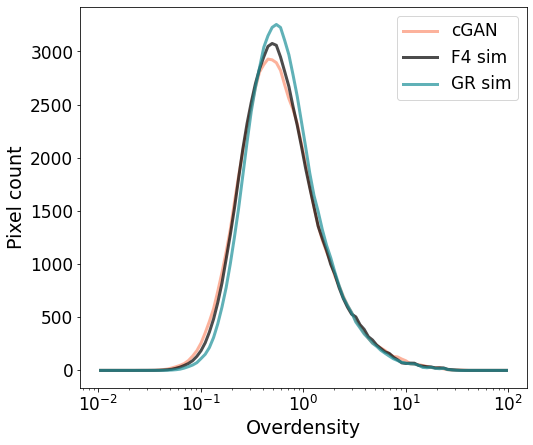

In [91]:
x_real = np.load(dir_path+'mass_hist_xaxis_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
y_fake = np.load(dir_path+'mass_gen_hist_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
y_real = np.load(dir_path+'mass_gt_hist_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')
y_ip = np.load(dir_path+'mass_ip_hist_mean_CHECK_F4_256X256_40epoch_F5_den_latent_interp_1.npy')

fig, ax = plt.subplots(1, 1, figsize=(8, 7))
ax.plot(x_real, y_fake, label=f'cGAN', c=gen_gt_color, alpha=0.7, linewidth=3)
ax.plot(x_real, y_real, label=f'F4 sim', c='black', alpha=0.7, linewidth=3)
ax.plot(x_real, y_ip, label=f'GR sim', c=ip_gt_color, alpha=0.7, linewidth=3)
ax.tick_params(axis='x', labelsize=ticklabelsize)
ax.tick_params(axis='y', labelsize=ticklabelsize)
ax.legend(fontsize=ticklabelsize)
ax.set_xscale('log');
# ax.set_yscale('log')
ax.set_ylabel('Pixel count', fontsize=axeslabelsize)
ax.set_xlabel('Overdensity', fontsize=axeslabelsize)

# Test on F4 -- F4 train

In [94]:
dir_path = 'new_approach/new_best_model_F4TEST_500examples/'

In [95]:
gts_cumulant_x2 = np.load(dir_path+'cumulant2_x_gt_CHECK_F4_256X256_40epoch_F4_den_1.npy')
ips_cumulant_y2 = np.load(dir_path+'cumulant2_y_ip_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')
gts_cumulant_y2 = np.load(dir_path+'cumulant2_y_gt_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')
gens_cumulant_y2 = np.load(dir_path+'cumulant2_y_gen_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')

gts_cumulant_x3 = np.load(dir_path +'cumulant3_x_gt_CHECK_F4_256X256_40epoch_F4_den_1.npy')
ips_cumulant_y3 = np.load(dir_path+'cumulant3_y_ip_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')
gts_cumulant_y3 = np.load(dir_path+'cumulant3_y_gt_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')
gens_cumulant_y3 = np.load(dir_path+'cumulant3_y_gen_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')

gts_cumulant_x4 = np.load(dir_path+'cumulant4_x_gt_CHECK_F4_256X256_40epoch_F4_den_1.npy')
ips_cumulant_y4 = np.load(dir_path+'cumulant4_y_ip_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')
gts_cumulant_y4 = np.load(dir_path+'cumulant4_y_gt_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')
gens_cumulant_y4 = np.load(dir_path+'cumulant4_y_gen_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')

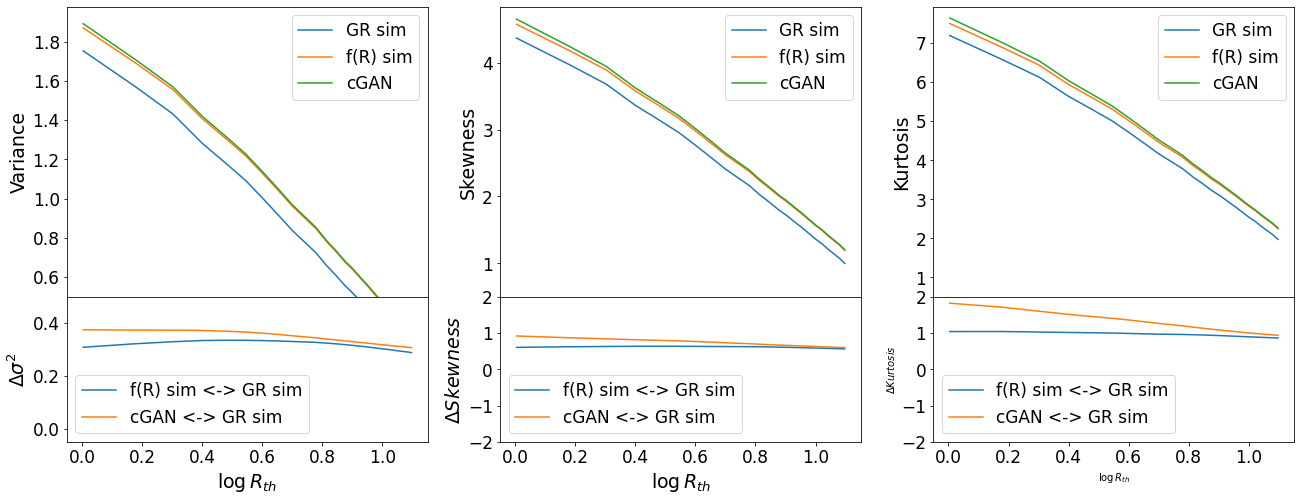

In [96]:
plot_variance_skewness_kurtosis(
    gts_cumulant_x2, ips_cumulant_y2, gts_cumulant_y2, gens_cumulant_y2,
    gts_cumulant_x3, ips_cumulant_y3, gts_cumulant_y3, gens_cumulant_y3,
    gts_cumulant_x4, ips_cumulant_y4, gts_cumulant_y4, gens_cumulant_y4
)

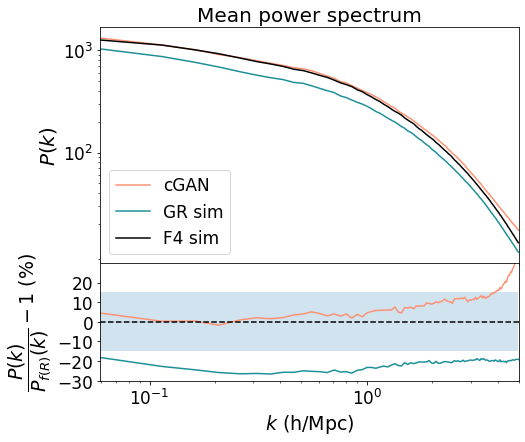

In [97]:
k = np.load(dir_path+'k_CHECK_F4_256X256_mean_40epoch_F4_den_1.npy')
ps_gen_median = np.load(dir_path+'ps_gen_CHECK_F4_256X256_mean_40epoch_F4_den_1.npy')
ps_ip_median = np.load(dir_path+'ps_ip_CHECK_F4_256X256_mean_40epoch_F4_den_1.npy')
ps_gt_median = np.load(dir_path+'ps_gt_CHECK_F4_256X256_mean_40epoch_F4_den_1.npy')

mean_ps(k, ps_gen_median, ps_gt_median, ps_ip_median, title='Mean power spectrum')

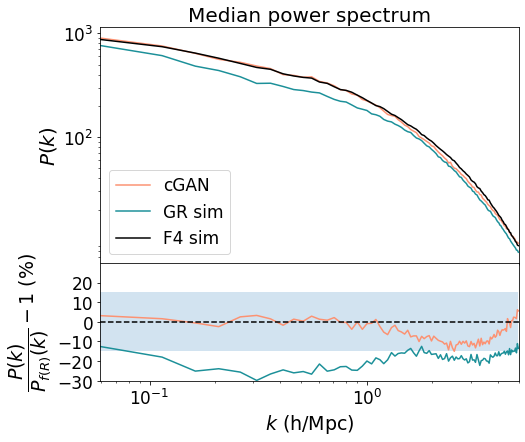

In [98]:
k = np.load(dir_path+'k_CHECK_F4_256X256_median_40epoch_F4_den_1.npy')
ps_gen_median = np.load(dir_path+'ps_gen_CHECK_F4_256X256_median_40epoch_F4_den_1.npy')
ps_ip_median = np.load(dir_path+'ps_ip_CHECK_F4_256X256_median_40epoch_F4_den_1.npy')
ps_gt_median = np.load(dir_path+'ps_gt_CHECK_F4_256X256_median_40epoch_F4_den_1.npy')

median_ps(k, ps_gen_median, ps_gt_median, ps_ip_median, title='Median power spectrum')

Text(0.5, 0, 'Overdensity')

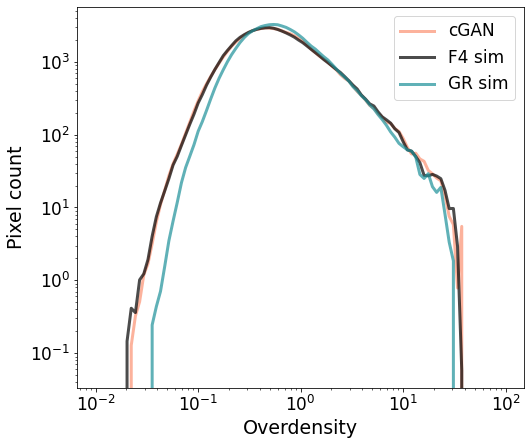

In [99]:
x_real = np.load(dir_path+'mass_hist_xaxis_CHECK_F4_256X256_40epoch_F4_den_1.npy')
y_fake = np.load(dir_path+'mass_gen_hist_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')
y_real = np.load(dir_path+'mass_gt_hist_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')
y_ip = np.load(dir_path+'mass_ip_hist_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')

fig, ax = plt.subplots(1, 1, figsize=(8, 7))
ax.plot(x_real, y_fake, label=f'cGAN', c=gen_gt_color, alpha=0.7, linewidth=3)
ax.plot(x_real, y_real, label=f'F4 sim', c='black', alpha=0.7, linewidth=3)
ax.plot(x_real, y_ip, label=f'GR sim', c=ip_gt_color, alpha=0.7, linewidth=3)
ax.tick_params(axis='x', labelsize=ticklabelsize)
ax.tick_params(axis='y', labelsize=ticklabelsize)
ax.legend(fontsize=ticklabelsize)
ax.set_xscale('log');
ax.set_yscale('log')
ax.set_ylabel('Pixel count', fontsize=axeslabelsize)
ax.set_xlabel('Overdensity', fontsize=axeslabelsize)

Text(0.5, 0, 'Overdensity')

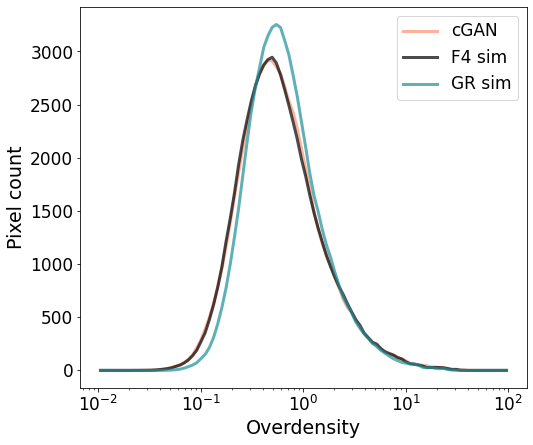

In [100]:
x_real = np.load(dir_path+'mass_hist_xaxis_CHECK_F4_256X256_40epoch_F4_den_1.npy')
y_fake = np.load(dir_path+'mass_gen_hist_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')
y_real = np.load(dir_path+'mass_gt_hist_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')
y_ip = np.load(dir_path+'mass_ip_hist_mean_CHECK_F4_256X256_40epoch_F4_den_1.npy')

fig, ax = plt.subplots(1, 1, figsize=(8, 7))
ax.plot(x_real, y_fake, label=f'cGAN', c=gen_gt_color, alpha=0.7, linewidth=3)
ax.plot(x_real, y_real, label=f'F4 sim', c='black', alpha=0.7, linewidth=3)
ax.plot(x_real, y_ip, label=f'GR sim', c=ip_gt_color, alpha=0.7, linewidth=3)
ax.tick_params(axis='x', labelsize=ticklabelsize)
ax.tick_params(axis='y', labelsize=ticklabelsize)
ax.legend(fontsize=ticklabelsize)
ax.set_xscale('log');
# ax.set_yscale('log')
ax.set_ylabel('Pixel count', fontsize=axeslabelsize)
ax.set_xlabel('Overdensity', fontsize=axeslabelsize)